# Init

In [59]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
pd.options.display.max_rows = 20

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [152]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [143]:
import os     
import pydotplus
from IPython.display import Image 
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
os.environ["PATH"] += os.pathsep + 'C:\\Users\\KJCHEN\\Miniconda3\\envs\\FDA\\Library\\bin\\graphviz'

---

# Original data

In [60]:
titanic = pd.read_csv('train.csv')

In [61]:
titanic.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
92,93,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.1750,E31,S
115,116,0,3,"Pekoniemi, Mr. Edvard",male,21.0,0,0,STON/O 2. 3101294,7.9250,NaN,S
132,133,0,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,0,A/5. 3337,14.5000,NaN,S
322,323,1,2,"Slayter, Miss. Hilda Mary",female,30.0,0,0,234818,12.3500,NaN,Q
314,315,0,2,"Hart, Mr. Benjamin",male,43.0,1,1,F.C.C. 13529,26.2500,NaN,S
312,313,0,2,"Lahtinen, Mrs. William (Anna Sylfven)",female,26.0,1,1,250651,26.0000,NaN,S
760,761,0,3,"Garfirth, Mr. John",male,NaN,0,0,358585,14.5000,NaN,S
705,706,0,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.0000,NaN,S
524,525,0,3,"Kassem, Mr. Fared",male,NaN,0,0,2700,7.2292,NaN,C
89,90,0,3,"Celotti, Mr. Francesco",male,24.0,0,0,343275,8.0500,NaN,S


In [62]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


---

# Drop Columns

In [63]:
for col in ['PassengerId', 'Name', 'Ticket', 'Cabin']:
    titanic.drop(col, axis=1, inplace=True)

---

# Handle Missing Values

In [64]:
age = titanic['Age']
age.fillna(value=age.mean(), inplace=True)
embarked = titanic['Embarked']
embarked.fillna(value=embarked.value_counts().idxmax(), inplace=True)

---

# Analysis / Modification

## Pclass

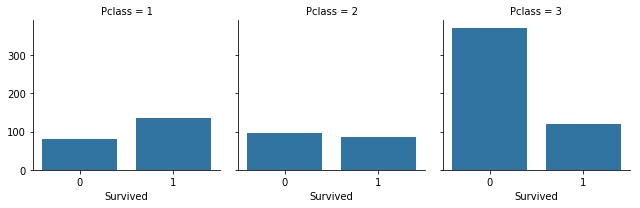

In [65]:
sns.FacetGrid(titanic, col='Pclass').map(sns.countplot, 'Survived', order=[0,1]);

In [66]:
col = 'Pclass'
pclass = titanic[col]

onehot = pd.get_dummies(pd.Categorical(pclass), prefix=col)
titanic = pd.concat([titanic, onehot], axis=1).drop(col, axis=1)

## Embarked

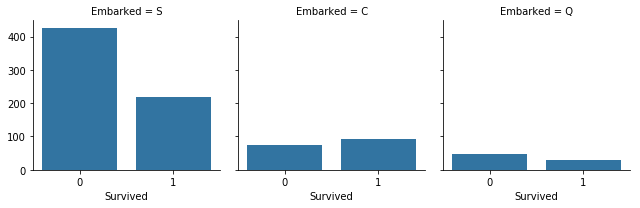

In [67]:
sns.FacetGrid(titanic, col='Embarked').map(sns.countplot, 'Survived', order=[0,1]);

In [68]:
col = 'Embarked'
embarked = titanic[col]

onehot = pd.get_dummies(pd.Categorical(embarked), prefix=col)
titanic = pd.concat([titanic, onehot], axis=1).drop(col, axis=1)

## Sex

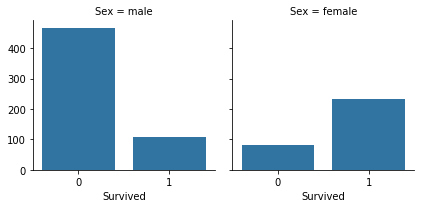

In [69]:
sns.FacetGrid(titanic, col='Sex').map(sns.countplot, 'Survived', order=[0,1]);

In [70]:
titanic['Sex'] = titanic['Sex'].map({'male': 1, 'female': 0})

---

# Processed data

In [71]:
titanic.sample(10)

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
725,0,1,20.000000,0,0,8.6625,0,0,1,0,0,1
650,0,1,29.699118,0,0,7.8958,0,0,1,0,0,1
222,0,1,51.000000,0,0,8.0500,0,0,1,0,0,1
429,1,1,32.000000,0,0,8.0500,0,0,1,0,0,1
515,0,1,47.000000,0,0,34.0208,1,0,0,0,0,1
31,1,0,29.699118,1,0,146.5208,1,0,0,1,0,0
79,1,0,30.000000,0,0,12.4750,0,0,1,0,0,1
832,0,1,29.699118,0,0,7.2292,0,0,1,1,0,0
548,0,1,33.000000,1,1,20.5250,0,0,1,0,0,1
428,0,1,29.699118,0,0,7.7500,0,0,1,0,1,0


In [72]:
titanic.corr()['Survived'].abs().sort_values(ascending=False)

Survived      1.000000
Sex           0.543351
Pclass_3      0.322308
Pclass_1      0.285904
Fare          0.257307
Embarked_C    0.168240
Embarked_S    0.149683
Pclass_2      0.093349
Parch         0.081629
Age           0.069809
SibSp         0.035322
Embarked_Q    0.003650
Name: Survived, dtype: float64

---

# Preprocessing for training

In [141]:
target = 'Survived'
X, y = titanic.drop(target, axis=1), titanic[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6)

In [142]:
def get_accuracy(classifier):
    classifier.fit(X_train, y_train)
    y_predict = classifier.predict(X_test)
    return accuracy_score(y_test, y_predict)

---

# Decision Tree

In [144]:
dtc = DecisionTreeClassifier(max_depth=4)
get_accuracy(dtc)

0.8130841121495327

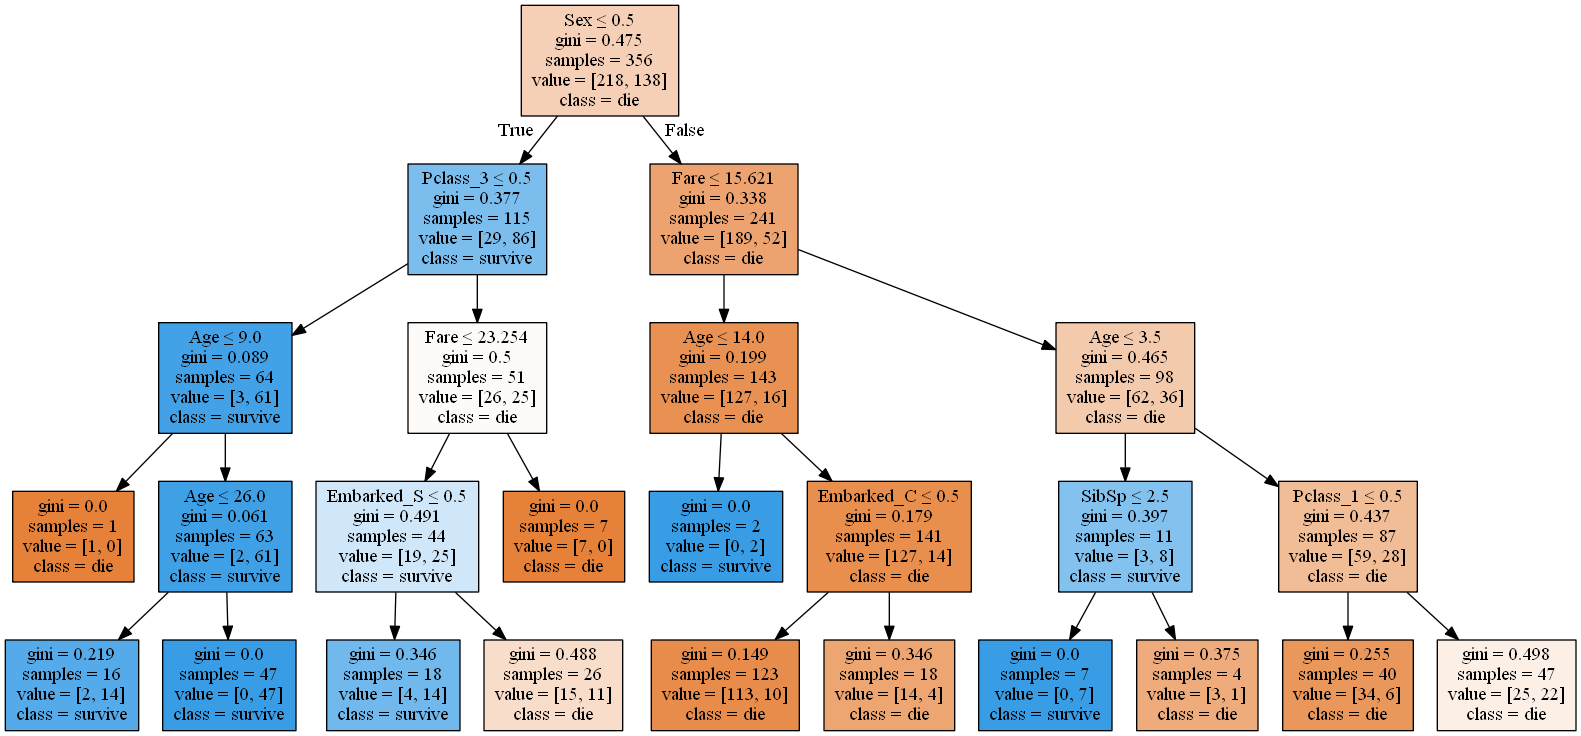

In [147]:
dot_data = StringIO()
export_graphviz(dtc, 
                out_file=dot_data,  
                filled=True, 
                feature_names=list(X_train),
                class_names=['die','survive'],
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_pdf("tree.pdf")
Image(graph.create_png())

# Random Forest

In [149]:
rfc = RandomForestClassifier(n_estimators=100)
get_accuracy(rfc)

0.7869158878504673

# SVM

In [151]:
svc = SVC(gamma='scale')
get_accuracy(svc)

0.6728971962616822

# Logistic Regression

In [153]:
lr = LogisticRegression(solver='lbfgs')
get_accuracy(lr)

C:\Users\KJCHEN\Miniconda3\envs\FDA\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.8074766355140187